In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
X = pd.read_csv(r"C:\Users\dell\Desktop\dengue_features_train.csv")
y = pd.read_csv(r"C:\Users\dell\Desktop\dengue_labels_train.csv")

In [35]:
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [36]:
y.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [38]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [39]:
X.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [40]:
y.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


In [41]:
X.shape

(1456, 24)

In [42]:
y.shape

(1456, 4)

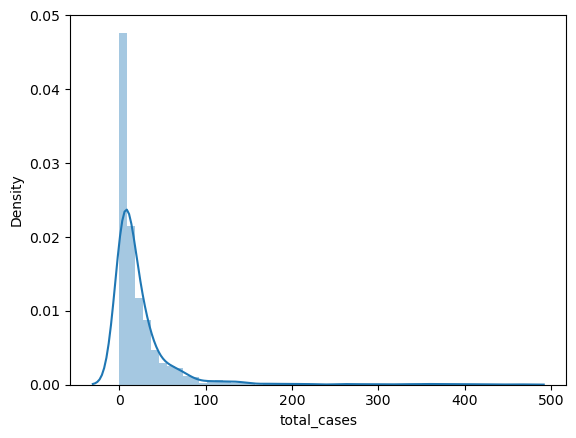

In [43]:
sns.distplot(y['total_cases'])

plt.show()

In [44]:
def yearly_pattern(city, year, ylim = (0,200)):
    df = y[y['city'] == city][y['year'] == year]
    df.plot.bar('weekofyear', 'total_cases', legend=False, ylim = ylim)

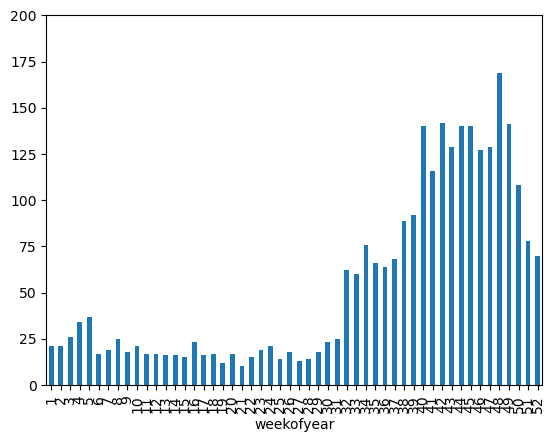

In [45]:
yearly_pattern('sj', 1991)

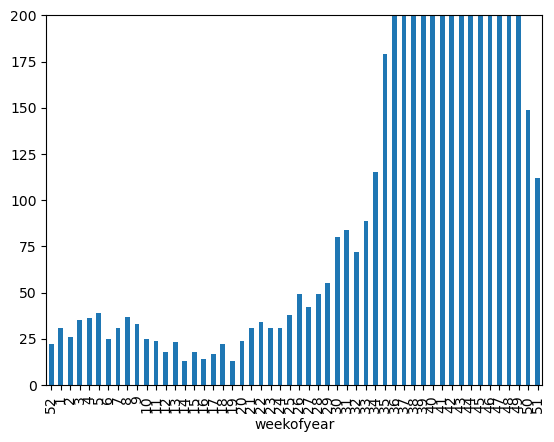

In [46]:
yearly_pattern('sj', 1994)

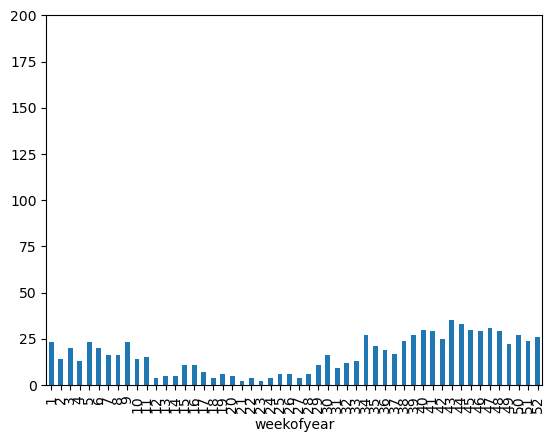

In [47]:
yearly_pattern('sj', 1996)

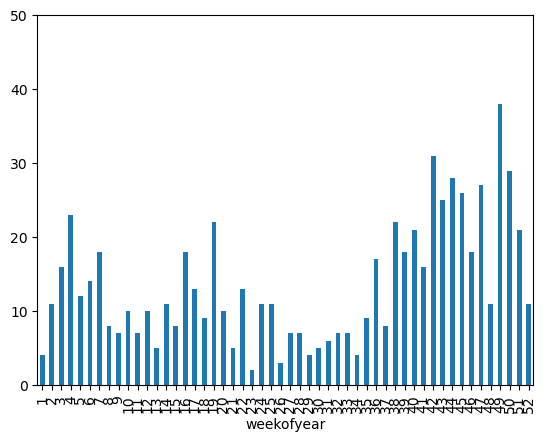

In [48]:
yearly_pattern('iq', 2002, (0,50))

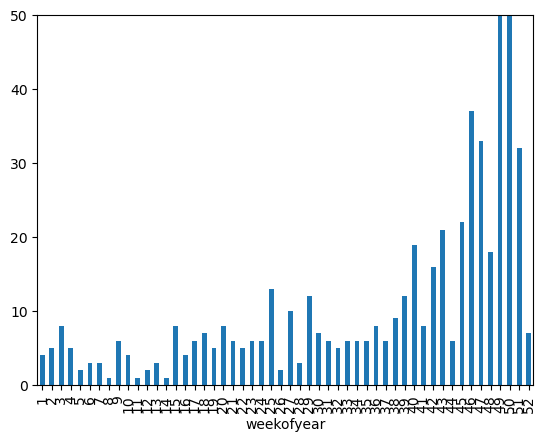

In [49]:
yearly_pattern('iq', 2004, (0,50))

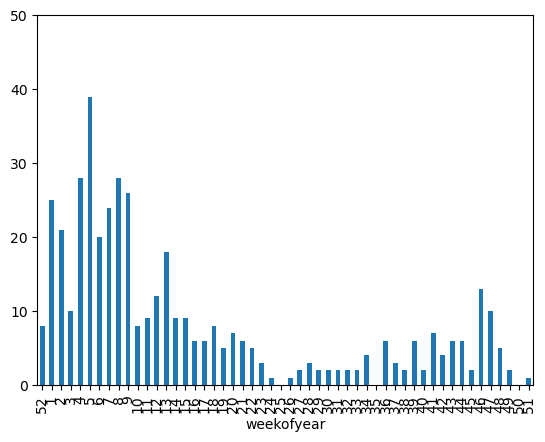

In [50]:
yearly_pattern('iq', 2006, (0,50))

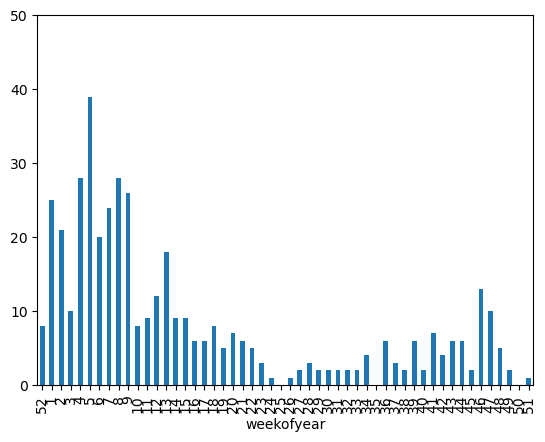

In [51]:
yearly_pattern('iq', 2006, (0,50))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
def extract_month(s):
    return int(s[5:7])

In [54]:
def pre_process(X, train = True):

    is_sj = X.city == 'sj'

    months = X.week_start_date.apply(extract_month)


    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
    
    if train:
        X.dropna(inplace=True)
    else:
        X.fillna(0,inplace=True)

    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

    X['is_sj'] = is_sj.loc[X.index]

    sliced_months = months.loc[X.index]
    month_features = pd.get_dummies(sliced_months)
    X = X.join(month_features)
    
    return X

In [55]:
X = pre_process(X)

In [56]:
y = y.total_cases.loc[X.index]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [58]:
x_train

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,3,4,5,6,7,8,9,10,11,12
1061,1.222454,1.250007,1.144280,0.591976,0.291259,-0.238509,0.515005,1.179651,1.770805,-1.384216,...,0,0,0,0,0,0,0,0,1,0
911,-2.794700,-1.515939,-0.005277,-0.383855,-0.749030,1.414008,1.143816,0.356730,-0.321879,1.010419,...,0,0,0,0,0,0,0,0,1,0
432,-0.232163,-0.643473,-0.330495,-0.393796,-0.538423,1.240169,0.877563,1.442529,-0.200564,1.280780,...,0,0,0,0,0,1,0,0,0,0
1121,1.291405,1.675054,0.685724,1.618564,-0.425127,0.692472,1.257115,0.391019,1.406860,-0.766246,...,0,0,0,0,0,0,0,0,0,0
1165,0.539788,0.272788,-0.039443,0.156949,0.565349,-0.525448,-0.034495,1.144411,0.739627,-0.766246,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1.007337,0.668954,-0.795704,-0.890523,0.477307,0.810808,0.384711,0.904392,-0.534181,0.624187,...,0,0,0,0,0,0,0,1,0,0
1345,0.404621,1.341905,0.787262,0.232460,-0.405433,-2.804205,-3.031257,-1.372927,0.224038,-2.736025,...,0,0,1,0,0,0,0,0,0,0
1222,1.534267,0.709139,1.571389,0.592031,1.552349,-0.362081,0.265747,1.088216,0.860942,-0.264145,...,0,0,0,0,0,0,0,0,0,0
1336,-0.074777,0.319778,-1.068650,-0.643774,1.123027,-0.482512,0.277077,0.397686,0.557655,-0.997984,...,1,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [88]:
model = XGBClassifier(learning_rate =0.3,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 seed=27)

In [89]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [90]:
pred = model.predict(x_test)

In [91]:
pred

array([ 42,  11,   8,   1,   6,   7,   2,   2,  17,  30,  17,  61,  29,
         4,  72,  15,   4,   3,  66,   0,  52,   4,  17,  23,   9,   6,
         8,  27,  43,   9,  36,  35,  23,   4,  43,   0,   2,   2,  60,
        10,   3,  10,  23,  16,  26,  43,   0,   7,  18,  17,  40,  14,
        29,   2,  33,   2,   3,  67,   0,   4,  54,   0,  11,   0,  24,
         1,  21,   1,  48,  13,   9,  49,   3,  17,  17,  48,  26,  10,
        13,  38,  44,  58,   6,  14,   2,  13,   2,  28,   3,   1,   7,
        13,  68,   7,  10,  46,   3,  18,   1,   5,   1,  29,  14,   0,
         4,  64,  18,   5,  30,  70,  13,   0,  44,  13,  29,   1,   1,
         7,   2,  19,   1,   0,   2,  30,   0,  48,   6,   0,  28,  56,
        18,  15,   7,   0,  11,   2,  62,   2,  34,   0,  19,  67,   4,
         0,  50,  14,   1,   0,   0,  58,   6,   9,  94,   3,   4,   4,
         5,  16,   0,   5,   6,  42,   0,  40,  54,   0,  30,   8,  36,
        24,   4,   7,   0,   0,   9,   4,  25,   8,  12,   5,   

In [92]:
model.score(x_train,y_train)

1.0

In [93]:
model.score(x_test,y_test)

0.06666666666666667

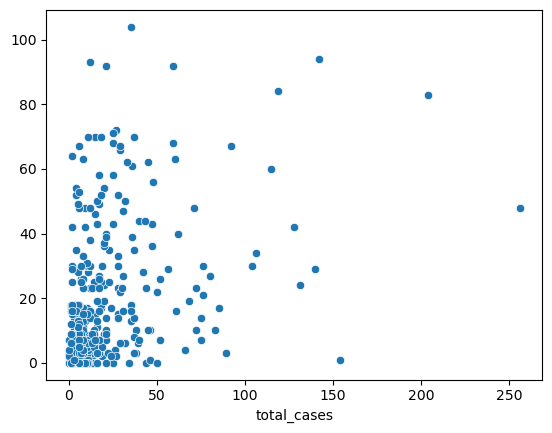

In [94]:
sns.scatterplot(y_test, pred)
plt.show()

In [95]:
import pickle
with open('Dengue Prediction','wb') as f:
    pickle.dump(model,f)